In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [35]:
# Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 
# 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

age_code = {
    1: '0~4세',
    2: '5~9세',
    3: '10~14세',
    4: '15~19세',
    5: '20~24세',
    6: '25~29세',
    7: '30~34세',
    8: '35~39세',
    9: '40~44세',
    10: '45~49세',
    11: '50~54세',
    12: '55~59세',
    13: '60~64세',
    14: '65~69세',
    15: '70~74세',
    16: '75~79세',
    17: '80~84세',
    18: '85세+'
}

ex01_df = df.copy()[['연령대코드(5세단위)', '허리둘레']]

# 연령대코드 -> 연령대 변경.
ex01_df['연령대'] = ex01_df['연령대코드(5세단위)'].replace(age_code)

ex01_df = ex01_df.drop('연령대코드(5세단위)', axis = 1)

# 허리둘레 값에 대한 기술통계 값 구하기
# 소수 자리 셋째 자리까지 나타냄.
ex01_df = ex01_df \
            .groupby('연령대') \
            .describe() \
            .round(3)

display(ex01_df)


허리둘레                                               
           count    mean     std   min   25%   50%   75%    max
연령대                                                            
20~24세   23244.0  75.152  12.252  47.5  67.5  73.4  81.0  999.0
25~29세   64898.0  77.705  16.736  48.0  69.0  76.5  84.2  999.0
30~34세   77517.0  81.089  22.988  49.0  72.0  80.1  88.0  999.0
35~39세   84621.0  82.094  14.522   9.2  75.0  82.0  89.0  999.0
40~44세  130912.0  80.488  10.803  42.1  73.0  80.0  87.0  999.0
45~49세  118357.0  80.822   9.522  40.0  74.0  81.0  87.0  137.0
50~54세  129833.0  81.063   9.095   6.5  75.0  81.0  87.0  142.0
55~59세  112175.0  81.800   8.730  32.0  76.0  82.0  87.5  139.0
60~64세  106491.0  82.723   8.596   0.0  77.0  83.0  88.0  137.0
65~69세   53624.0  83.588   8.444  50.0  78.0  83.5  89.0  129.0
70~74세   51586.0  84.063   8.540  51.0  78.0  84.0  90.0  129.8
75~79세   25972.0  84.200   8.772  50.0  78.0  84.0  90.0  122.0
80~84세   16205.0  83.751   9.041  38.0  78.0  84.0  90.0  120.0
85세+      4125.0  81.737  17.326  34.0  75.0  81.5  88.0  999.0

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


/var/folders/qy/mqrntgss7mj10n3mnynr6xhh0000gn/T/ipykernel_1765/2418357940.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ex02_df, dtype = np.bool))


<AxesSubplot:>

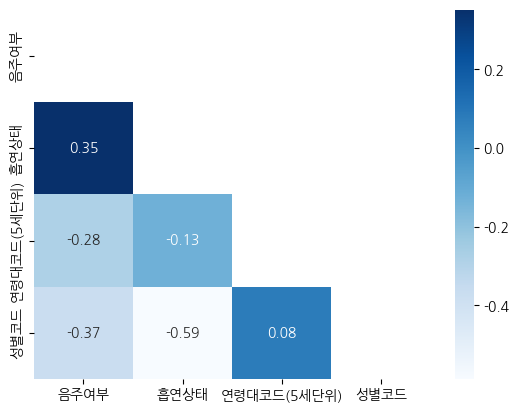

In [45]:
# Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드" 에 대한 상관계수를 구하고 시각화 해주세요.

ex02_df = df.copy()

fields = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]

# 각 데이터 별 상관계수를 구한다.
ex02_df = ex02_df.corr()

# 구한 상관관계 데이터에 대해 반올림 처리를 한다.
ex02_df = ex02_df.loc[fields, fields]

# 상관관계 도표 보여주기
display(ex02_df)

# mask 적용
mask = np.triu(np.ones_like(ex02_df, dtype = np.bool))

sns.heatmap(data = ex02_df, annot = True, fmt = '.2f', cmap = 'Blues', mask = mask)


흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


Text(0, 0.5, '해당인원수')

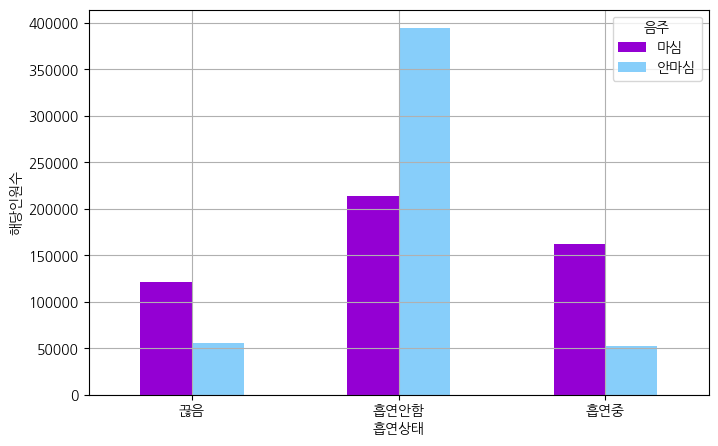

In [94]:
# Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

# 문제 요구 사항 중 시각화를 풀이하기 위한 라이브러리 호출
import matplotlib.pyplot as plt

ex03_df = df.copy()

# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 흡연상태 -> 흡연 변경.
ex03_df['흡연'] = ex03_df['흡연상태'].replace(smoke)

# 음주여부 -> 음주 변경.
ex03_df['음주'] = ex03_df['음주여부'].replace(drink)

# groupby 를 사용한 풀이
ex03_group = ex03_df.copy()

ex03_group = ex03_group[['음주', '흡연']] \
                .groupby(['음주', '흡연']) \
                .value_counts() \
                .unstack()

#display(ex03_group)

# pivot_table 를 사용한 풀이
ex03_pivot = ex03_df.copy()

ex03_pivot = pd \
                .pivot_table( \
                    data = ex03_pivot, 
                    index = '음주',
                    columns = '흡연',
                    aggfunc = 'count',
                    values = '가입자일련번호'
                )

#display(ex03_pivot)

# crosstab 을 사용한 풀이
ex03_cross = ex03_df.copy()

ex03_cross = pd \
                .crosstab(
                    index = ex03_cross['음주'],
                    columns = ex03_cross['흡연']
                )

display(ex03_cross)

# 위 데이터들은 전부 동일하게 나온다. 시각화는 ex03_cross 를 사용해서 시도.
# 문제에 요구한 바와 같이 정답이 나오게끔 하기 위해, 행렬을 바꾸는 transpose() 함수를 사용했다.
# 음주자는 보라색, 비음주자는 하늘색으로 설정.
graph = ex03_cross.transpose().plot.bar(
    figsize = (8,5), 
    grid = True,
    rot = 0,
    color = ['darkviolet', 'lightskyblue']
)

# 라벨을 따로 설정한다.
graph.set_xlabel('흡연상태')
graph.set_ylabel('해당인원수')

120 kg 1181


,총콜레스테롤,감마지티피,흡연,음주
1219,182.0,47.0,흡연중,안마심
2309,107.0,19.0,흡연중,안마심
3497,214.0,111.0,흡연중,마심
3685,218.0,58.0,끊음,안마심
5788,194.0,35.0,흡연안함,안마심


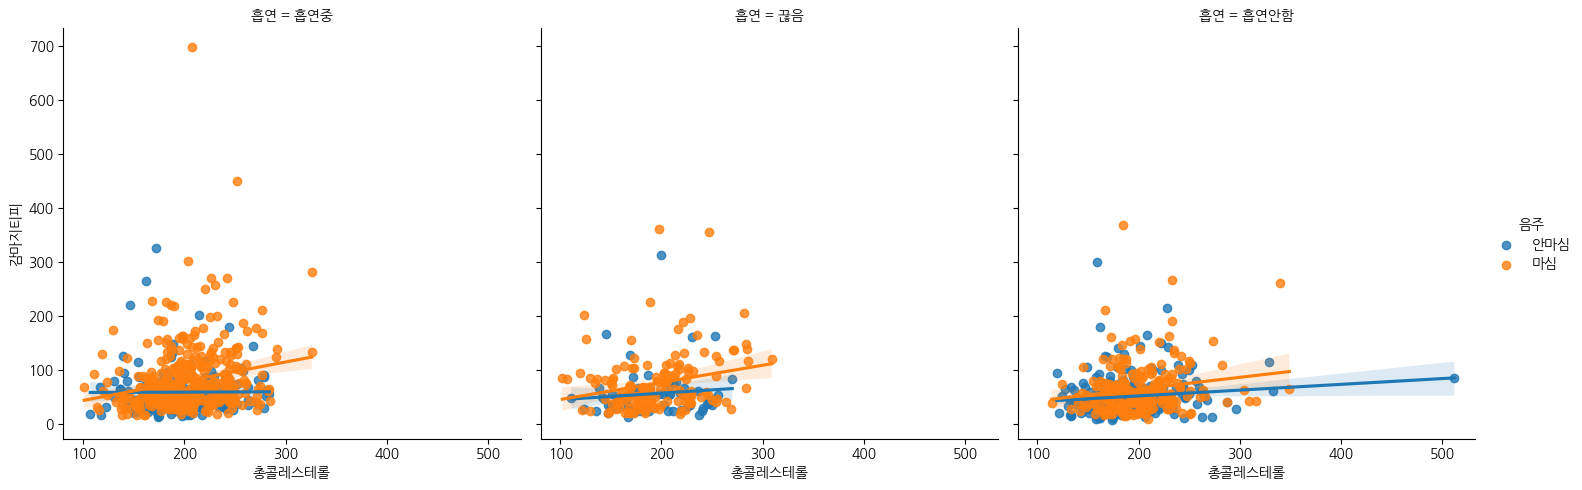

In [35]:
# Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

ex04_df = df.copy()

# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 흡연상태 -> 흡연 변경.
ex04_df['흡연'] = ex04_df['흡연상태'].replace(smoke)

# 음주여부 -> 음주 변경.
ex04_df['음주'] = ex04_df['음주여부'].replace(drink)

# 체중이 120 kg 인 사람의 수를 파악한다.
print('120 kg', len(ex04_df.loc[ex04_df['체중(5Kg 단위)'] >= 120]))

ex04_fat = ex04_df \
            .loc[ex04_df['체중(5Kg 단위)'] >= 120] \
            [['총콜레스테롤', '감마지티피', '흡연', '음주']]

# 전처리 이후 데이터 조회
display(ex04_fat.head())

sns.lmplot(ex04_fat, x = '총콜레스테롤', y = '감마지티피', hue = '음주', col = '흡연')

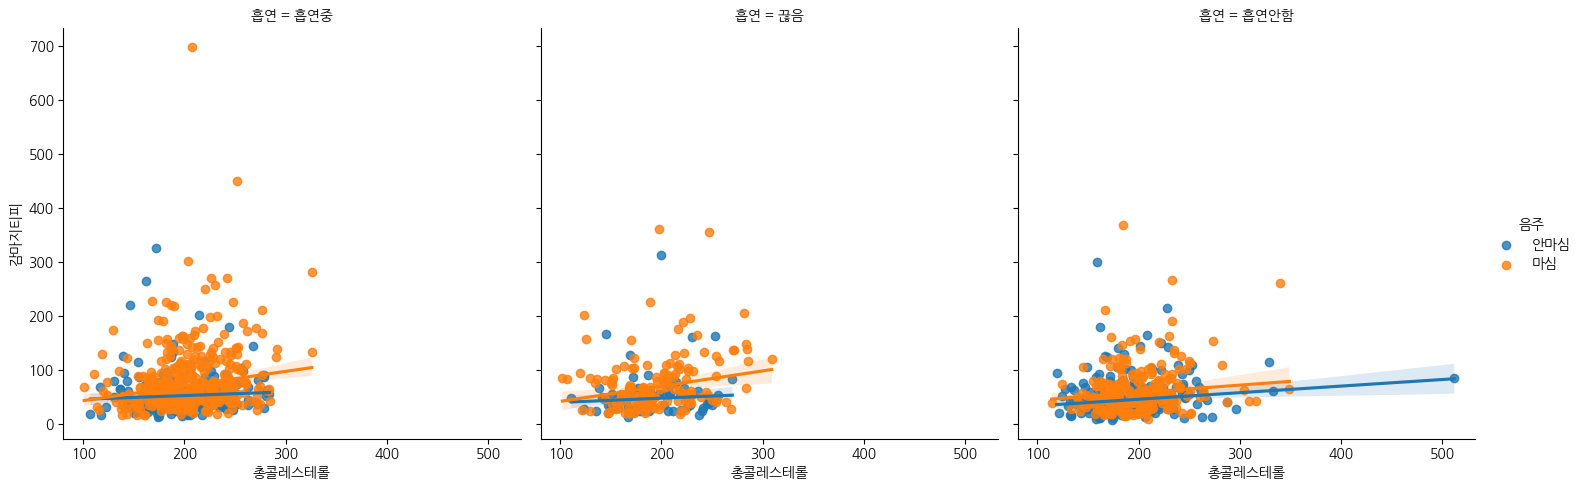

In [37]:
# 이상치 제거 이후 아래와 같이 그려진다. 작동 시간은 약 30 초 정도 걸린다.
sns.lmplot(ex04_fat, x = '총콜레스테롤', y = '감마지티피', hue = '음주', col = '흡연', robust = True)

시력 좌측 실명 수 3207
시력 우측 실명 수 3134


시력(좌)          
성별            남자        여자
연령대                       
20~24세  1.092088  0.989020
25~29세  1.108807  1.016223
30~34세  1.116810  1.028945
35~39세  1.137300  1.057884
40~44세  1.115202  1.027259
45~49세  1.052915  0.955033
50~54세  1.002117  0.909677
55~59세  0.954576  0.860812
60~64세  0.880873  0.787469
65~69세  0.805634  0.710081
70~74세  0.734978  0.649222
75~79세  0.658341  0.585453
80~84세  0.598952  0.529375
85세+    0.516524  0.423985

시력(우)          
성별            남자        여자
연령대                       
20~24세  1.083208  0.982942
25~29세  1.103274  1.005916
30~34세  1.112384  1.021275
35~39세  1.134918  1.050337
40~44세  1.115071  1.019611
45~49세  1.052925  0.948932
50~54세  1.001562  0.905961
55~59세  0.955980  0.859603
60~64세  0.885777  0.786056
65~69세  0.805667  0.708644
70~74세  0.739421  0.652349
75~79세  0.663824  0.587187
80~84세  0.603440  0.536744
85세+    0.522724  0.433822

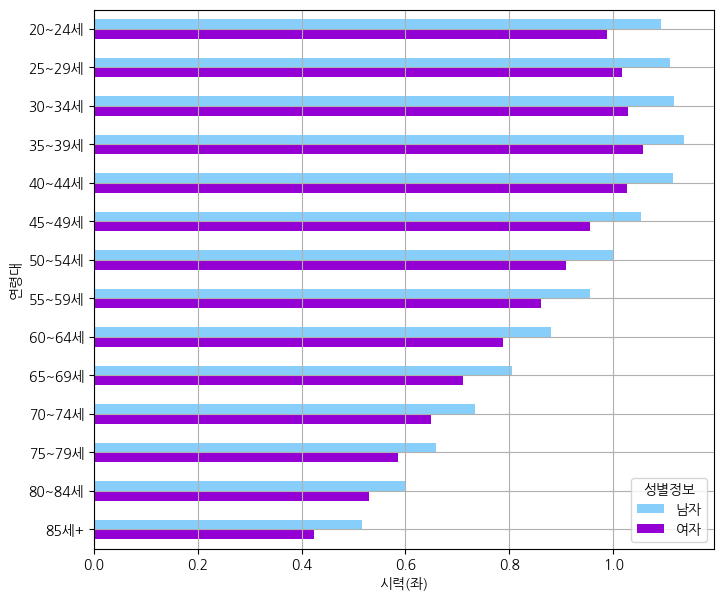

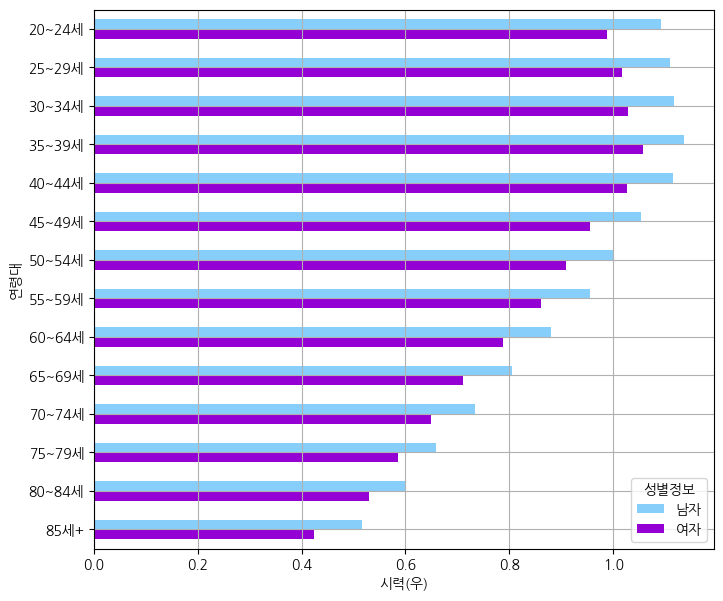

In [24]:
# Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

# 문제 요구 사항 중 시각화를 풀이하기 위한 라이브러리 호출
import matplotlib.pyplot as plt

ex05_df = df.copy()

# 실명 데이터를 파악해본다.
print('시력 좌측 실명 수', len(ex05_df.loc[ex05_df['시력(좌)'] == 9.9]))
print('시력 우측 실명 수', len(ex05_df.loc[ex05_df['시력(우)'] == 9.9]))

# 성별 데이터
gender_code = {
    1: '남자',
    2: '여자'
}

# 연령대 데이터
age_code = {
    1: '0~4세',
    2: '5~9세',
    3: '10~14세',
    4: '15~19세',
    5: '20~24세',
    6: '25~29세',
    7: '30~34세',
    8: '35~39세',
    9: '40~44세',
    10: '45~49세',
    11: '50~54세',
    12: '55~59세',
    13: '60~64세',
    14: '65~69세',
    15: '70~74세',
    16: '75~79세',
    17: '80~84세',
    18: '85세+'
}

# 성별, 연령대 데이터를 넣어준다.
ex05_df['성별'] = ex05_df['성별코드'].replace(gender_code)
ex05_df['연령대'] = ex05_df['연령대코드(5세단위)'].replace(age_code)

# 왼쪽 시력 계산
ex05_left = ex05_df.copy()

ex05_left = ex05_left[['연령대', '성별', '시력(좌)']] \
                .loc[(ex05_df['시력(좌)'] >= 0.1) & (ex05_df['시력(좌)'] <= 2.5)] \
                .groupby(['연령대', '성별']) \
                .agg({'시력(좌)' : 'mean'}) \
                .unstack()

display(ex05_left)

# 오른쪽 시력 계산
ex05_right = ex05_df.copy()

ex05_right = ex05_right[['연령대', '성별', '시력(우)']] \
                .loc[(ex05_df['시력(우)'] >= 0.1) & (ex05_df['시력(우)'] <= 2.5)] \
                .groupby(['연령대', '성별']) \
                .mean() \
                .unstack()

display(ex05_right)

# 왼쪽 시력 그래프
graph_left = ex05_left.plot.barh(
    figsize = (8,7), 
    grid = True,
    rot = 0,
    color = ['lightskyblue', 'darkviolet']
)

# 원래 그래프는 역순으로 나오는데, dataframe 과 일치하게 나오려면 아래 함수로 설정한다.
graph_left.invert_yaxis()

# 라벨을 따로 설정한다.
graph_left.set_xlabel('시력(좌)')
graph_left.set_ylabel('연령대')

# 범례 설정
graph_left.legend(('남자', '여자', ), title = '성별정보')

# 오른쪽 시력 그래프
graph_right = ex05_left.plot.barh(
    figsize = (8,7), 
    grid = True,
    rot = 0,
    color = ['lightskyblue', 'darkviolet']
)

# 원래 그래프는 역순으로 나오는데, dataframe 과 일치하게 나오려면 아래 함수로 설정한다.
graph_right.invert_yaxis()

# 라벨을 따로 설정한다.
graph_right.set_xlabel('시력(우)')
graph_right.set_ylabel('연령대')

# 범례 설정
graph_right.legend(('남자', '여자', ), title = '성별정보')